In [1]:
#Importando libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import seaborn as sns
import datetime

In [3]:
#Arrumando problemas de importação do dataframe ou pra facilitar codigo

In [4]:
def fixDataframe(df):
    del df['Unnamed: 0']
    df['Data'] = df['Data'].apply(pd.to_datetime)
    df['Preco R$'] = df['Preco R$'].str.replace('.','')
    df['Preco R$'] = df['Preco R$'].str.split(',').str[0]
    df['Preco'] = df['Preco R$']
    
    del df['Preco R$']
    df['Preco'] = df['Preco'].astype(float)
    return df

In [5]:
#Importando dataframes

In [6]:
#dfI = fixDataframe(pd.concat(map(pd.read_csv, glob.glob(os.path.join('C:\\Users\\Braulio\\Documents\\Python Scripts\\dados\\iphone', "*.csv")))))
#dfS = fixDataframe(pd.concat(map(pd.read_csv, glob.glob(os.path.join('C:\\Users\\Braulio\\Documents\\Python Scripts\\dados\\samsung', "*.csv")))))
#dfX = fixDataframe(pd.concat(map(pd.read_csv, glob.glob(os.path.join('C:\\Users\\Braulio\\Documents\\Python Scripts\\dados\\xiaomi', "*.csv")))))

dfI = fixDataframe(pd.concat(map(pd.read_csv, glob.glob(os.path.join('C:\\dados\\iphone', "*.csv")))))
dfS = fixDataframe(pd.concat(map(pd.read_csv, glob.glob(os.path.join('C:\\dados\\samsung', "*.csv")))))
dfX = fixDataframe(pd.concat(map(pd.read_csv, glob.glob(os.path.join('C:\\dados\\xiaomi', "*.csv")))))

In [7]:
#Função plot media de preço ao longo dos dias

In [8]:
def plotMean(df):
    
    plt.plot(df.groupby(df.Data.dt.date).mean(), color='Blue')
    plt.xticks(rotation=90)
    plt.title(df['Item'].iloc[0])
    plt.ylabel('Média de Preço R$')
    plt.xlabel('Data')
    plt.show()
    
    return plt

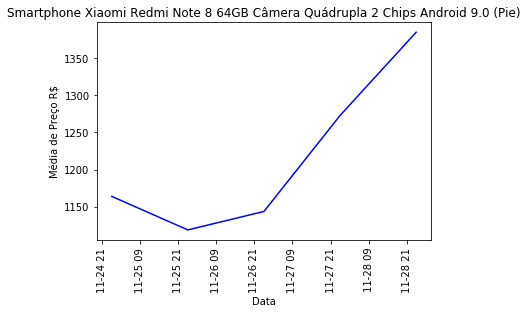

In [9]:
pltX = plotMean(dfX)

In [10]:
def plotBoxhist(df):
    sns.boxplot(y='Preco', x=df.Data.dt.date, 
                     data=df, 
                     width=0.5,
                     palette="colorblind",
                     showmeans=True)
    sns.pointplot(y='Preco', x=df.Data.dt.date, data=df, ci=None, color='black')
    plt.xticks(rotation=90)
    plt.title(df['Item'].iloc[0])
    plt.ylabel('Preço')
    plt.xlabel('Data')
    plt.show()
    
    return plt

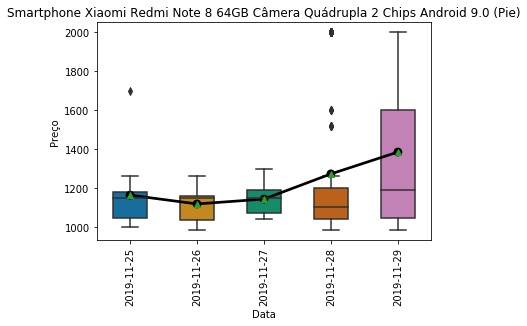

In [11]:
boxI = plotBoxhist(dfX)

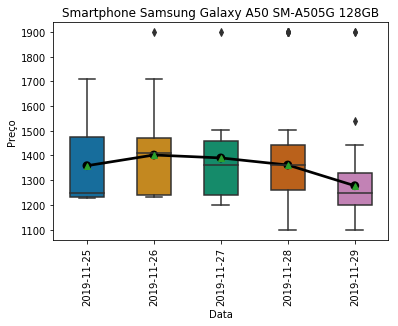

In [12]:
boxS = plotBoxhist(dfS)

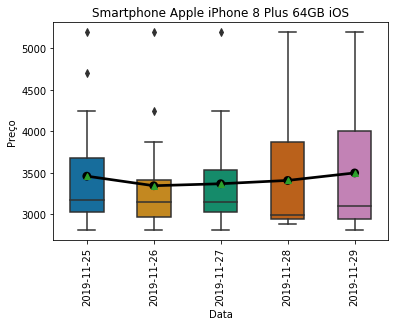

In [13]:
boxI = plotBoxhist(dfI)

In [14]:
def scatterPlot(df):
    plt.scatter(x='Preco',y='Loja',data = df)
    plt.show()
    
    
    return plt

In [16]:
#transformando o nome das lojas em letras para o artigo
def trocaNomePorLetra(dataFrame):
    a = 0
    #preenche o dicionario com a tabela asc de 65 até 90 A,...,Z
    dic = dict()
    for i in range(65,91):
        #print(chr(i))
        dic[i] = chr(i)
    inicioDicLivre = 65 #chave de inicio do dicionario que vai até a chave 90
    breaking = 0 #variavel usada para controlar quando a loja já foi modificada para uma letra

    quantLinhas = dataFrame.shape[0] #quantidade de linhas do dataFrame
    
    for i in range(quantLinhas): #tecnica parecida com criar matrizes em C que vimos em algoritmos utilizando 2 for
        a = 0
        breaking = 0
        controle = dataFrame['Loja'][i]
        while(a < quantLinhas):
            #verifica se a loja está no dicionario, se sim, passa para a próxima
            for k in range(65,91):
                if(controle == dic[k]):
                    breaking = 1
            #se a loja está no dicionario é pq ela já foi modificada entao nao precisa fazer nada
            if(breaking == 1):
                break
            #senão é pq essa loja ainda nao foi modificada entao continua para trocar o nome por letra
            if(controle == dataFrame['Loja'][a]):
                dataFrame['Loja'][a] = dic[inicioDicLivre]
            a = a + 1
        if(breaking != 1): #verifica se aquela letra do dicionario foi utilizada
            inicioDicLivre = inicioDicLivre + 1

In [19]:
trocaNomePorLetra(dfI) #chamada da funcao para trocar o nome por letra do iphone
trocaNomePorLetra(dfS) #chamada da funcao para trocar o nome por letra da samsung
trocaNomePorLetra(dfX) #chamada da funcao para trocar o nome por letra do xiaomi

#dfX['Loja']

AttributeError: 'Series' object has no attribute 'sort'

In [69]:
transformaDataEmData(dfI)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


TypeError: ufunc subtract cannot use operands with types dtype('<M8[ns]') and dtype('float64')

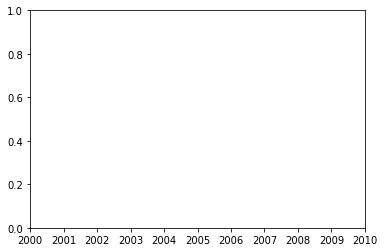

In [87]:
vetor = []
vetor = dfI['Preco']
plt.bar(dfI['Data'],dfI['Preco'])

In [63]:
# função para tirar o horario dá data
def transformaDataEmData(dataFrame):
    tamanho = dataFrame.shape[0]
    for i in range(tamanho):
        dataZoada = str(dataFrame['Data'][i])
        dataNormal = dataZoada[:10]
        dataFrame['Data'][i] = dataNormal